In [1]:
# https://www.youtube.com/watch?v=aQaZMC9-Jok

import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential  # Can not be moved
from tensorflow.keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D  # Can not be moved
from keras.layers import Activation, Dropout, Flatten, Dense # Can not be moved
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
currentPath = os.getcwd()

In [3]:
train_data = currentPath + os.sep + "data" + os.sep + "data" + os.sep + "train"
test_data = currentPath + os.sep + "data" + os.sep + "data" + os.sep + "test"

# Número de iteraciones sobre todo el dataset de entrenamiento
epochs = 20

# Dimensiones de las imágenes para procesar
n_H, n_W = 100, 100

# Utilizaremos mini-batch
batch_size = 32

# Número de iteraciones que vamos a procesar la información en cada epoca (entrenamiento)
train_samples = 1000

# Número de iteraciones que vamos a procesar la información en cada epoca (validación)
validation_samples = 200

# Definamos la tasa de aprendizaje
learning_rate = 0.05

# Número de clases
class_num = 3

# Estructura de la red neuronal convolucionales
filter_conv1 = 32
size_filter1 = (3,3)

filter_conv2 = 64
size_filter2 = (2,2)

#Usaremos un Max Pooling
size_pool = (2,2)


# 1. Antes de comenzar con el modelo, vamos a preprocesar las imágenes
train_datagen = ImageDataGenerator(
    rescale = 1./255,          # Normalizar los valores de los pixeles
    shear_range= 0.3,           # Rango del ángulo que podemos inclinar nuestras imágenes
    zoom_range = 0.3,            # Rango del zoom que podemos hacer a nuestras imágenes
    horizontal_flip = True       # Invierte imágenes
)

test_datagen = ImageDataGenerator(
    rescale = 1./255           # Normalizar los valores de los pixeles
)

# Accede al directorio, preprocesa las imágenes y organiza en mini-batchs
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (n_H, n_W),             # Tamaño de las imágenes
    batch_size = batch_size,              # Tamaño del mini-batch
    class_mode = 'categorical'            # Modelo para clasificación
)

# Accede al directorio, preprocesa las imágenes y organiza en mini-batchs
validation_generator = test_datagen.flow_from_directory(
    test_data,
    target_size = (n_H, n_W),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 999 images belonging to 3 classes.
Found 2043 images belonging to 3 classes.


In [4]:
# Check for TensorFlow or Thieno
if K.image_data_format() == "channels_first":
    input_shape = (3, n_W, n_H)
else:
    input_shape = (n_W, n_H, 3)



In [4]:
# 2. Crear la ConvNet
def createModel():
    model = Sequential()
    model.add(Conv2D(filter_conv1, size_filter1, padding="same", input_shape=(n_H, n_W,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=size_pool))
    model.add(Conv2D(filter_conv2, size_filter2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=size_pool))
    model.add(Flatten())
    model.add(Dense(255, activation=None))
    model.add(Dropout(0.5))
    model.add(Dense(class_num, activation='softmax'))

    return model

In [5]:
print(train_generator.class_indices)
imgs, labels = next(train_generator)

{'cat': 0, 'dog': 1, 'gorilla': 2}


In [6]:
def imshow(image_RGB):
    image_0_2_1 = image_RGB
    print(image_0_2_1.shape)
    plt.imshow(image_0_2_1)

32
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[1. 0. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)
[0. 1. 0.]
(100, 100, 3)


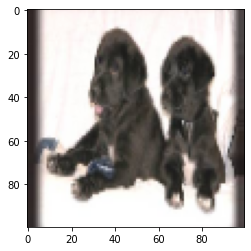

In [7]:
image_batch, label_batch = train_generator.next()

print(len(image_batch))
for index in range(0, len(image_batch)):
    image = image_batch[index]
    print(label_batch[index])
    imshow(image)

In [8]:
model = createModel()
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate),  
              metrics=['accuracy'])

In [9]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=train_samples, 
    epochs=epochs, 
    validation_data = validation_generator, 
    validation_steps=validation_samples)

Epoch 1/20
   6/1000 [..............................] - ETA: 5:56 - loss: 579.8962 - accuracy: 0.5052

KeyboardInterrupt: 

In [12]:
# Definamos donde queremos guardar nuestro modelo y los pesos
dirPath=currentPath + os.sep + "model" + os.sep

In [ ]:
if not os.path.exists(dirPath):
    os.mkdir(dirPath)
    
model.save(dirPath + "model.h5")
model.save_weights(dirPath + "weights.h5")

In [ ]:
# Lets plot the results
print(history.history.keys())
# history accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
# history accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

(100, 100, 3)
[[0.387083   0.60709023 0.00582673]]
dog


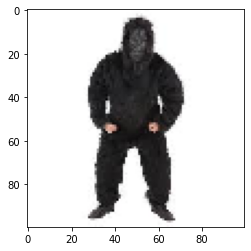

In [13]:
# Evaluate
model = createModel()
model.load_weights(dirPath + os.sep + "weights.h5")

img_path = test_data + os.sep + "gorilla" + os.sep + "18.jpeg"
img = load_img(img_path, target_size=(n_H, n_W))

imgArray = img_to_array(img)
# Update to 0-1 format
imgArray = imgArray / 255.0
print(imgArray.shape)
plt.imshow(imgArray)
# The modelexspect batches then lets do a batch of 1 
imgArray = np.expand_dims(imgArray, axis=0)

# Predict
classList = os.listdir(test_data)
prediction = model.predict(imgArray)
print(prediction)
prediction = model.predict_classes(imgArray)
print(classList[prediction[0]])




In [14]:
# Lets predict the gorillas
gorillapath = test_data + os.sep + "cat" + os.sep
imagesPredict = [f for f in listdir(gorillapath) if isfile(join(gorillapath,f))]
# print(imagesPredict)

for file in imagesPredict:
    img = load_img(gorillapath + file, target_size=( n_W, n_H))
    tensorImage = img_to_array(img)
    tensorImage = np.expand_dims(tensorImage, axis=0)
    gorillaPrediction = model.predict_classes(tensorImage, batch_size = 1)
    print(classList[gorillaPrediction[0]])

        

cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
gorilla
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
gorilla
cat
cat
gorilla
cat
cat
gorilla
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
gorilla
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
gorilla
cat
